In [1]:
%matplotlib qt5


In [2]:
import mne
import os.path as op
import numpy as np
from matplotlib import pyplot as plt
%matplotlib
from mne.io import read_raw_brainvision

from numpy.testing import assert_array_equal
import os
import numpy as np
from mne.preprocessing.peak_finder import peak_finder

Using matplotlib backend: Qt5Agg


In [3]:
mne.__version__


'0.17.0'

In [4]:
file = '/home/jan/Documents/Doktorarbeit/Daten/BekJan/HOAF_EDA_Resp0002.vhdr'

In [5]:
raw = mne.io.read_raw_brainvision(file, preload=True)

Extracting parameters from /home/jan/Documents/Doktorarbeit/Daten/BekJan/HOAF_EDA_Resp0002.vhdr...
Setting channel info structure...


<ipython-input-5-a8df2c13f76c>:1: DeprecationWarning: stim_channel (default True in 0.17) will change to False in 0.18 and be removed in 0.19, set it to False in 0.17 to avoid this warning
  raw = mne.io.read_raw_brainvision(file, preload=True)


Reading 0 ... 20218199  =      0.000 ...  4043.640 secs...
Used Annotations descriptions: ['Stimulus/S 10', 'Stimulus/S  7', 'Response/R128', 'Stimulus/S  6', 'Stimulus/S  5', 'Stimulus/S  4', 'Stimulus/S  3', 'Stimulus/S  2', 'Stimulus/S  1']


<ipython-input-5-a8df2c13f76c>:1: RuntimeWarning: 1 event(s) will be dropped, such as ['SyncStatus/Sync On']. Consider using the event_id parameter to parse events that do not follow the BrainVision format. For more information, see the docstring of read_raw_brainvision.
  raw = mne.io.read_raw_brainvision(file, preload=True)


In [6]:
raw


<RawBrainVision  |  HOAF_EDA_Resp0002.eeg, n_channels x n_times : 3 x 20218200 (4043.6 sec), ~462.8 MB, data loaded>

In [7]:
raw.info


<Info | 16 non-empty fields
    bads : list | 0 items
    ch_names : list | GSR_MR_100, Resp, STI 014
    chs : list | 3 items (EEG: 1, STIM: 1, MISC: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 250.0 Hz
    meas_date : tuple | 2018-06-13 13:52:50 GMT
    nchan : int | 3
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 5000.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType
    xplotter_layout : NoneT

In [8]:
# Laden der roh Daten, hier noch in mehreren Dimensionen
data = raw.get_data()
fig = raw.plot(None, 10.0,0.0,3,'w',None,(0.8,0.8,0.8),'cyan','auto')

In [9]:
#raw.plot(None, 10.0,0.0,3,'w',None,(0.8,0.8,0.8),'cyan','auto')


In [10]:
fig.savefig('/home/jan/Documents/Doktorarbeit/Analyse/Physio/')

In [11]:
ch_labels = ['GSR_MR_100', 'Resp', 'Stim']
ch_types = ['misc', 'misc', 'stim']
sfreq = 250

In [12]:
info = mne.create_info(ch_labels, sfreq, ch_types)
raw.info['description'] = 'Music stress experiment in the MRI scanner with respiratory channel'
raw.info['buffer_size_sec'] = 1

In [13]:
#Definiere dass nur der respiratorische Channel gnutzt wird
raw.pick_channels(['Resp'])


<RawBrainVision  |  HOAF_EDA_Resp0002.eeg, n_channels x n_times : 1 x 20218200 (4043.6 sec), ~154.3 MB, data loaded>

In [14]:
# Trennung des Zeit und des Datenvektors
data,times=raw[:]
datavector=np.reshape(data,20218200)


In [15]:
default = (max(datavector)-min(datavector))/30

In [16]:
#Einspeisen des Datenvektors in peakfinder 
peak_loc, peak_mag = peak_finder(datavector,thresh=default, extrema=-1)

In [17]:
%edit peak_finder

In [18]:
peak_mag[:20]

array([-0.4716866, -0.4637514, -0.4201078, -0.4910668, -0.4687872,
       -0.4643618, -0.4294164, -0.376159 , -0.4300268, -0.4024062,
       -0.4620728, -0.441014 , -0.4680242, -0.475349 , -0.5789644,
       -0.3988964, -0.4666508, -0.4431504, -0.482216 , -0.3900456])

In [19]:
peak_loc

array([    2718,    25294,    43971, ..., 20128698, 20131270, 20218144])

In [20]:
len(peak_loc)

1038

In [21]:
peak_times = times[peak_loc]
peak_times

array([5.4360000e-01, 5.0588000e+00, 8.7942000e+00, ..., 4.0257396e+03,
       4.0262540e+03, 4.0436288e+03])

In [22]:
resp = raw.get_data()[0]
plt.vlines(x=peak_times, ymin=-1, ymax=1)
plt.plot(times, resp)

In [72]:
a = np.where(times >= 3000)[0][0]
b = np.where(times <= 3300)[0][-1]
a = 0; b = len(times)
tresp = resp[a:b]
# for thres in [default, default*90]:
thres = default
tpeak_loc, _ = peak_finder(tresp, thresh=thres, extrema=-1)
tpeak_times = times[a:b][tpeak_loc]
plt.vlines(x=tpeak_times, ymin=-1, ymax=1)
plt.plot(times[a:b], tresp)

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.01285297, 0.01285297, 0.02570594, 0.03855891, 0.01285297,
        0.01285297, 0.02570594, 0.01285297, 0.01285297, 0.02570594,
        0.        , 0.01285297, 0.01285297, 0.        , 0.        ,
        0.        , 0.        , 0.02570594, 0.        , 0.01285297,
        0.        , 0.        , 0.02570594, 0.03855891, 0.01285297,
        0.02570594, 0.03855891, 0.10282376, 0.08997079, 0.1285297 ,
        0.16708861, 0.15423564, 0.14138267, 0.20564752, 0.39844206,
        0.23135346, 0.35988315, 0.33417722, 0.47555988, 0.46270691,
        0.47555988, 0.61694255, 0.48841285, 0.46270691, 0.5526777 ,
        0.65550146, 0.48841285, 0.69406037, 0.48841285, 0.424148  ,
        0.50126582, 0.46270691, 0.33417722, 0.34703019, 0.20564752,
        0.26991237, 0.28276534, 0.23135346, 0.21850049, 0.2570594 ,
        0.10282376, 0.14138267, 0.15423564, 0.07711782, 0.06426485,
        0.07711782, 0.06426485, 0.05141188, 0.03

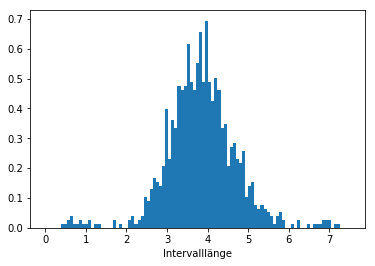

In [88]:
%matplotlib inline
plt.xlabel(u"Intervalllänge")
plt.hist(np.diff(tpeak_times), bins=np.linspace(0, 7.5, num=100), 
          label="Verteilung der Atmungsintervalllaengen", density=True)


In [87]:
np.linspace(0, 7.5, num=10)

array([0.        , 0.83333333, 1.66666667, 2.5       , 3.33333333,
       4.16666667, 5.        , 5.83333333, 6.66666667, 7.5       ])

In [25]:
start = 1098
stop = 1822

In [26]:
def number_peak(start =start, stop=stop):
    return len(peak_times[(peak_times>=start )& (peak_times<=stop)])

    

In [27]:
pt_1 = peak_times[(peak_times>=start )& (peak_times<=stop)]

In [28]:
len(pt_1)

196

In [29]:
times[20120541]

4024.1082

In [30]:
min(datavector)

-4.9726235999999995

In [31]:
max(datavector)

1.0360014

In [32]:
number_peak()

196

In [49]:
#time rc1 start
rc1a = times[5365177]+6

1080.0354

In [50]:
#time rc1 stop
1rc1e = times[5365177]+66

1139.0354

In [51]:
#time mc1 start
1mc1a = times[5365177]+94

1167.0354

In [52]:
#time mc1 stop
1mc1e = times[5365177]+152

1225.0354

In [53]:
#time rs1 start
1rs1a = times[5365177]+182

1255.0354

In [54]:
#time rs1 stop
1rs1e = times[5365177]+242

1315.0354

In [55]:
#time ms1 start
1ms1a = times[5365177]+270

1343.0354

In [57]:
#time ms1 stop
1ms1e = times[5365177]+330

1403.0354

In [ ]:
#time rc2 start
1rc2a = times[5365177]+358

In [58]:
#time rc2 stop
1rc2e = times[5365177]+413

1486.0354

In [59]:
#time mc2 start
1mc2a = times[5365177]+446

1519.0354

In [60]:
#time mc2 stop
1mc2e = times[5365177]+501

1574.0354

In [61]:
#time rs2 start
1rs2a = times[5365177]+534

1607.0354

In [62]:
#time rs2 stop
1rs2e = times[5365177]+594

1667.0354

In [63]:
#time ms2 start
1ms2a = times[5365177]+622

1695.0354

In [67]:
#time ms2 stop
1ms2e = times[5365177]+682

1755.0354

In [65]:
#Zeitspanne erster Stressblock
times[8982913]-times[5365177]

723.5472

In [40]:
#Zeitspanne zweiter Stressblock
times[17888542]-times[14270812]

723.5459999999998